In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
from sklearn.preprocessing import LabelEncoder
import copy
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv(r"C:\Users\YashnaBehera\Downloads\train_0irEZ2H.csv")
data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [4]:
print('There are', '\033[1m', data.shape[0], '\033[0m', 'observations in the dataset and',
      '\033[1m', data.shape[1], '\033[0m','variables, where one refers to the record_ID and 7 independent variables and 1 target variable (units sold)')

There are  150150  observations in the dataset and  9  variables, where one refers to the record_ID and 7 independent variables and 1 target variable (units sold)


In [167]:
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

There is missing values in the data. For total price, only 1 of the data is missing values;

##### MISSING VALUE TREATMENT


Considering that the some of the total price are equivalent to base price, we will change the missing total price to its base price.

In [169]:
data[data["total_price"].isnull()==True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [170]:
data['total_price'].fillna(469.5375,inplace=True)
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# Typecasting

In [15]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n',  (data.dtypes == 'float64').sum(), '\033[0m', 
      'float variables \n' '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 5  Integer variables 
 2  object variables 
 - 0  Object vaiables


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  category      
 3   sku_id           150150 non-null  category      
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  category      
 7   is_display_sku   150150 non-null  category      
 8   units_sold       150150 non-null  int64         
 9   moy              150150 non-null  int64         
 10  woy              150150 non-null  int64         
 11  doy              150150 non-null  int64         
 12  dow              150150 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(6)
memory usage: 10.9

In [11]:
data['record_ID'] = data['record_ID'].astype('category')
data['store_id'] = data['store_id'].astype('category')
data['sku_id'] = data['sku_id'].astype('category')
data['is_featured_sku'] = data['is_featured_sku'].astype('category')
data['is_display_sku'] = data['is_display_sku'].astype('category')

In [8]:
import datetime as dt 
data['week'] = pd.to_datetime(data['week'])

data['moy'] = data['week'].dt.month

data["woy"] = data["week"].apply(lambda x: x.isocalendar()[1])

data['doy'] = data['week'].dt.dayofyear

data['dow'] = data['week'].dt.dayofweek

## Discriptive Info

In [12]:
round(data.describe(),2)

,total_price,base_price,units_sold,moy,woy,doy,dow
count,150149.00,150150.00,150150.00,150150.00,150150.00,150150.0,150150.00
mean,206.63,219.43,51.67,6.13,24.99,171.3,1.40
std,103.31,110.96,60.21,3.44,14.87,104.2,1.79
min,41.32,61.28,1.00,1.00,1.00,1.0,0.00
25%,130.39,133.24,20.00,3.00,12.00,80.0,0.00
50%,198.08,205.91,35.00,6.00,23.50,160.0,1.00
75%,233.70,234.41,62.00,9.00,38.00,262.0,2.00
max,562.16,562.16,2876.00,12.00,52.00,360.0,6.00


In [13]:
data.describe(include = ['category'])

,record_ID,store_id,sku_id,is_featured_sku,is_display_sku
count,150150,150150,150150,150150,150150
unique,150150,76,28,2,2
top,212644,8094,219009,0,0
freq,1,3120,9750,135794,130150


## Univariate Analysis

In [27]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'green', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 15)
    plt.ylabel('density', fontsize = 15)
    plt.title('std_dev = {};kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)),fontsize=15)
    plt.tight_layout()

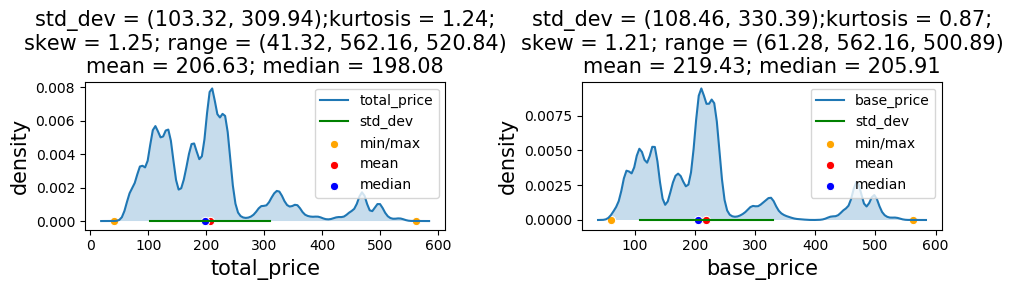

In [38]:
UVA_KDE(data,["total_price","base_price"])

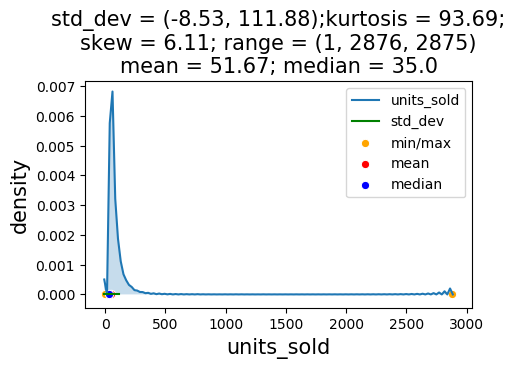

In [23]:
UVA_KDE(data,["units_sold"])

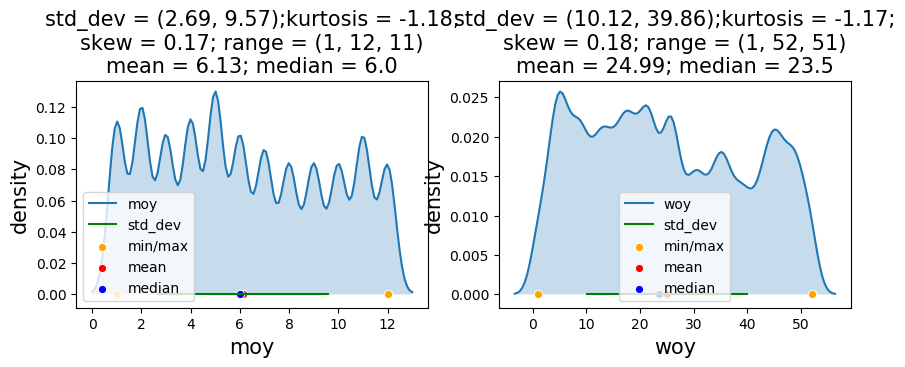

In [24]:
UVA_KDE(data,["moy","woy"])

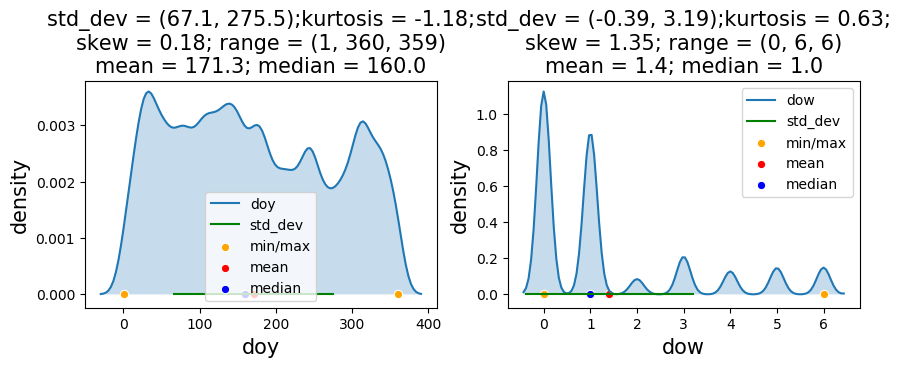

In [25]:
UVA_KDE(data,["doy","dow"])

In [35]:
def UVA_category(data, var_group):
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,color="yellow")
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    #plt.tight_layout()

In [28]:
data['moy'] = data['moy'].astype('category')
data['dow'] = data['dow'].astype('category')
data['woy'] = data['woy'].astype('category')
data['doy'] = data['doy'].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  category      
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  category      
 3   sku_id           150150 non-null  category      
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  category      
 7   is_display_sku   150150 non-null  category      
 8   units_sold       150150 non-null  int64         
 9   moy              150150 non-null  int64         
 10  woy              150150 non-null  int64         
 11  doy              150150 non-null  int64         
 12  dow              150150 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(2), int64(5)
memory usage: 16.5

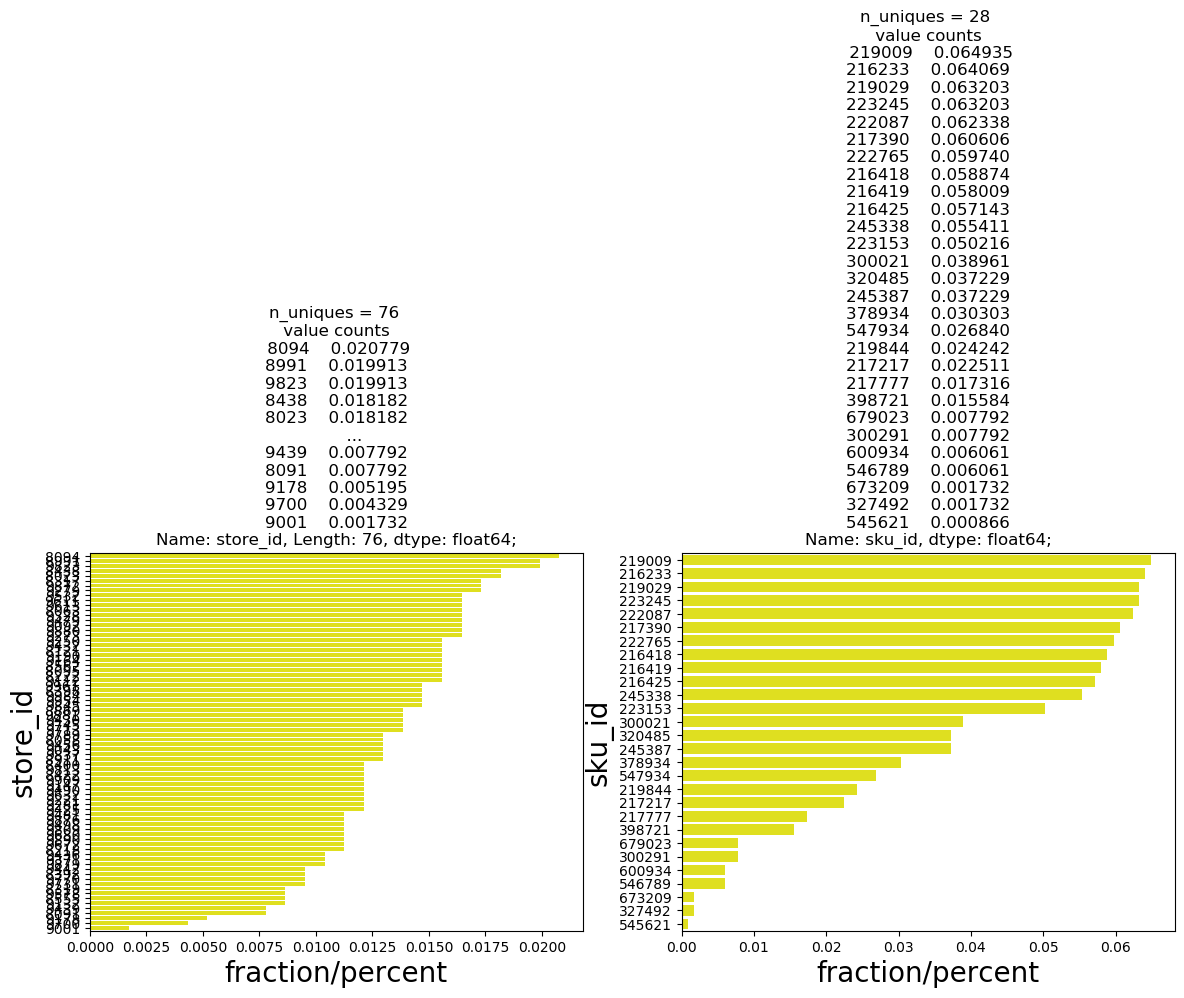

In [36]:
UVA_category(data,["store_id","sku_id"])

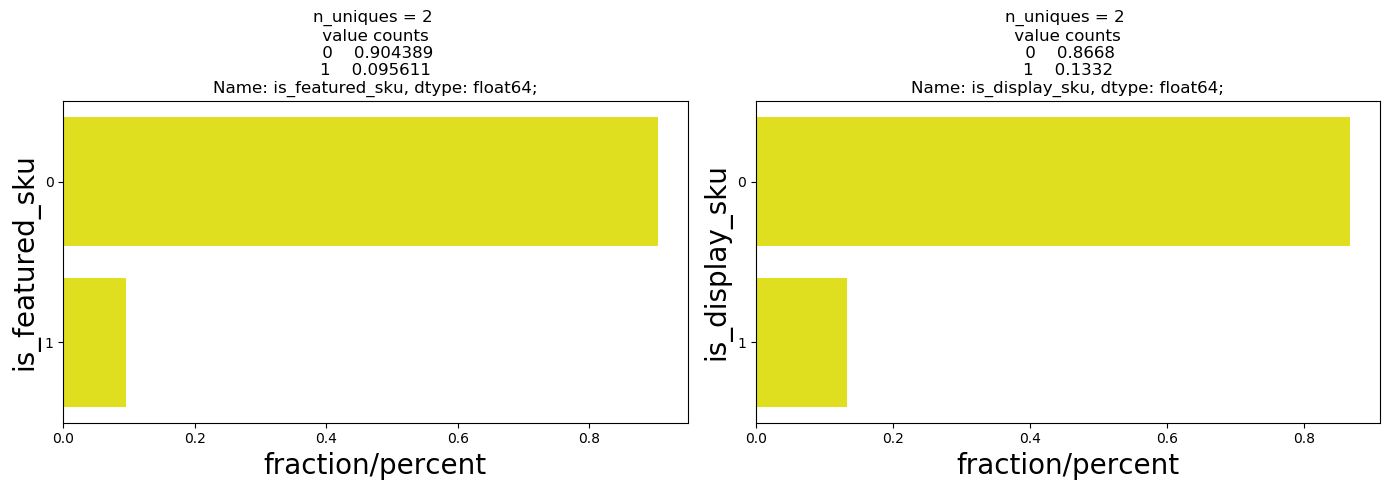

In [32]:
UVA_category(data,["is_featured_sku","is_display_sku"])

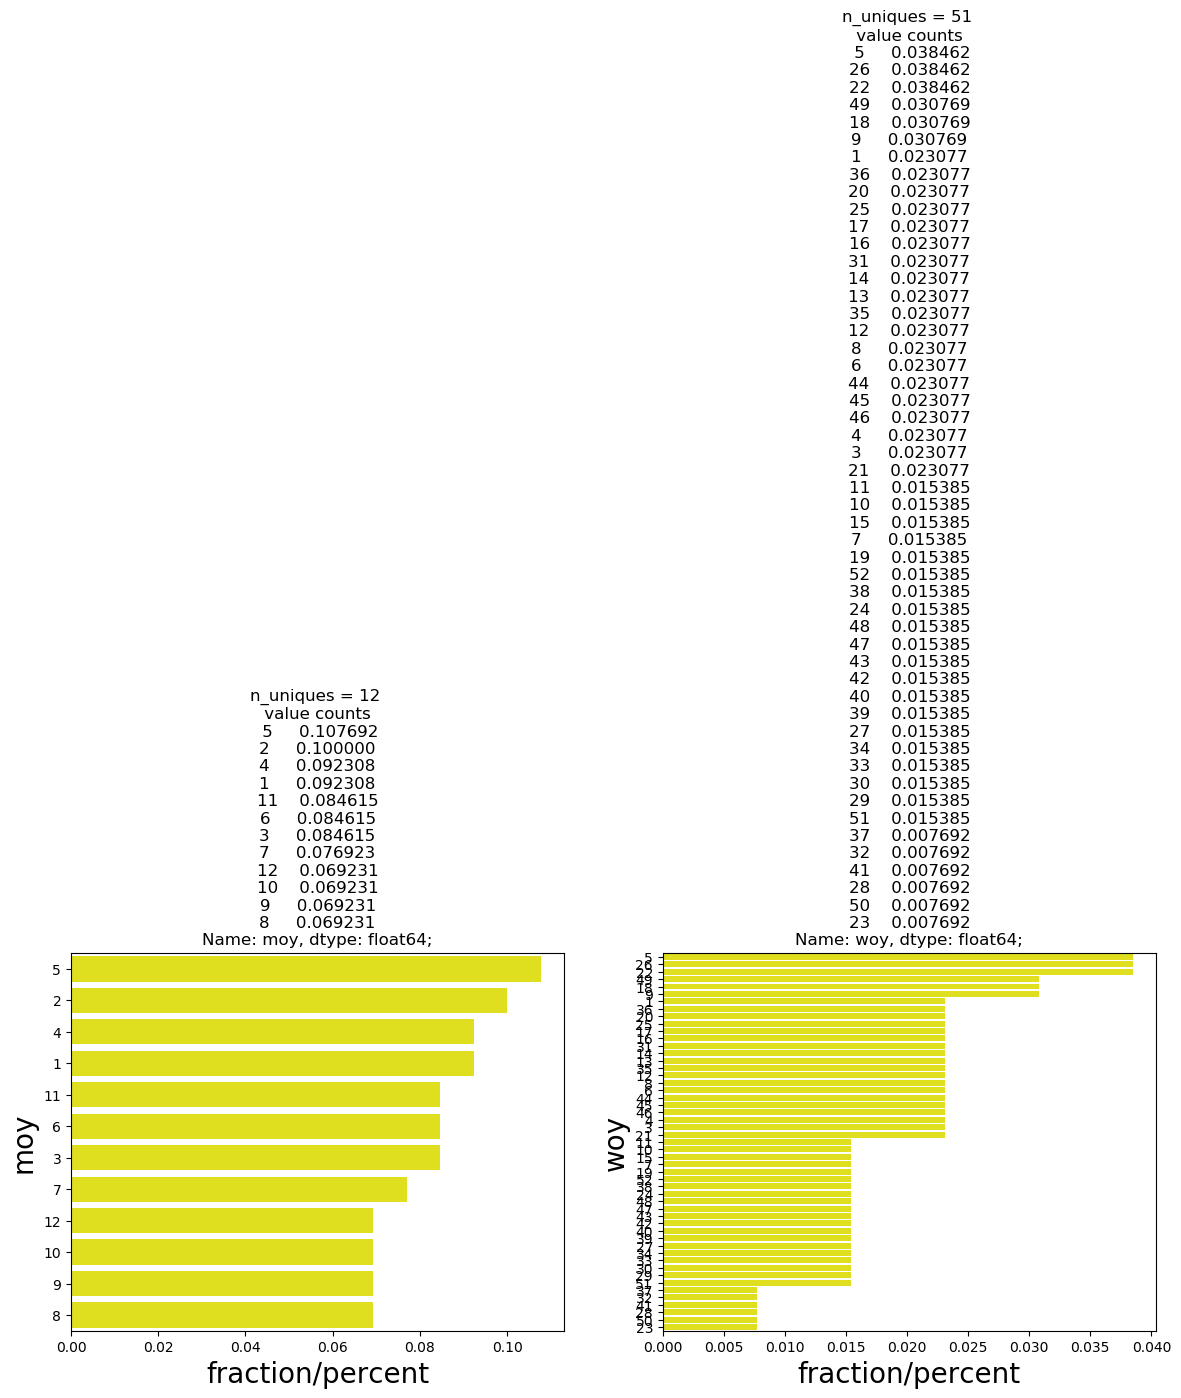

In [37]:
UVA_category(data,["moy","woy"])

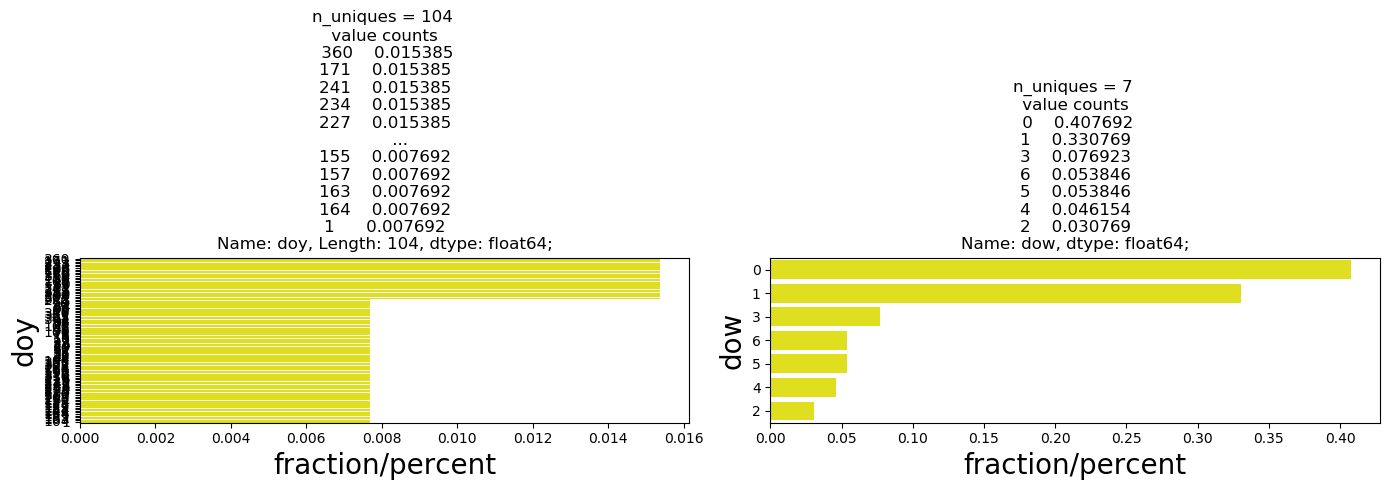

In [34]:
UVA_category(data,["doy","dow"])

In [39]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

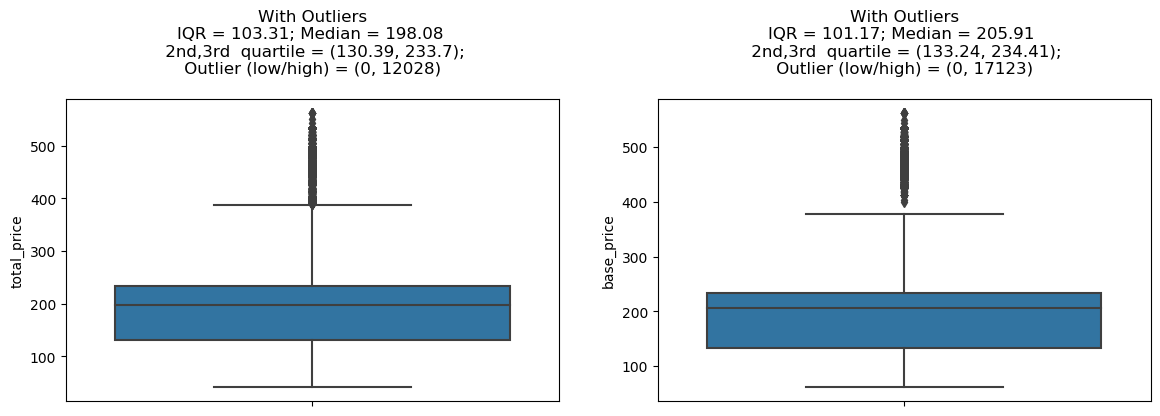

In [40]:
UVA_outlier(data,["total_price","base_price"])

# Bivariate Analysis

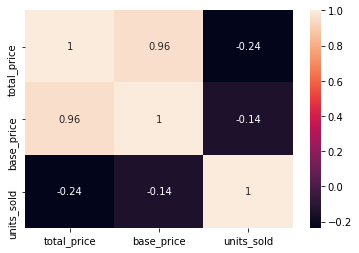

In [42]:
sns.heatmap(data.corr(),annot=True)

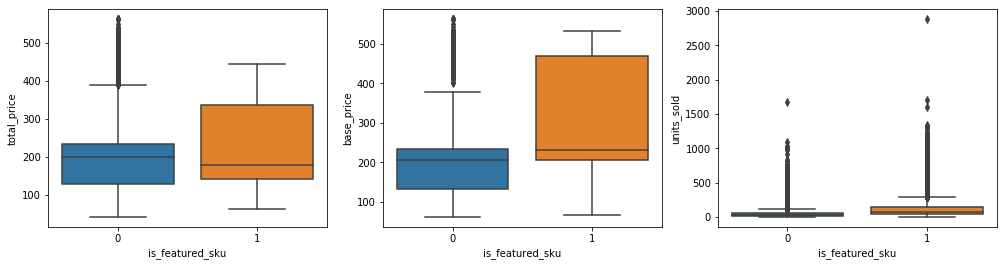

In [45]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x="is_featured_sku",
    y="total_price",
    data=data)

plt.subplot(1, 3, 2)
sns.boxplot( x="is_featured_sku",
    y='base_price',
    data=data)

plt.subplot(1, 3, 3)
sns.boxplot( x="is_featured_sku",
    y='units_sold',
    data=data)

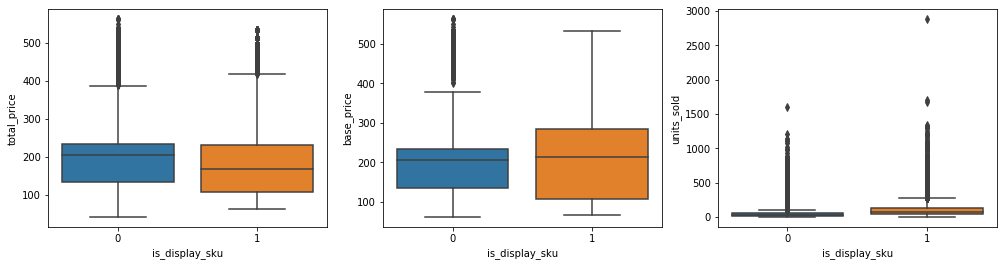

In [46]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x="is_display_sku",
    y="total_price",
    data=data)
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x="is_display_sku",
    y='base_price',
    data=data)
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x="is_display_sku",
    y='units_sold',
    data=data)

In [51]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not{}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

In [ ]:
# x="is_featured_sku",
#     y="total_price",
#     data=data)

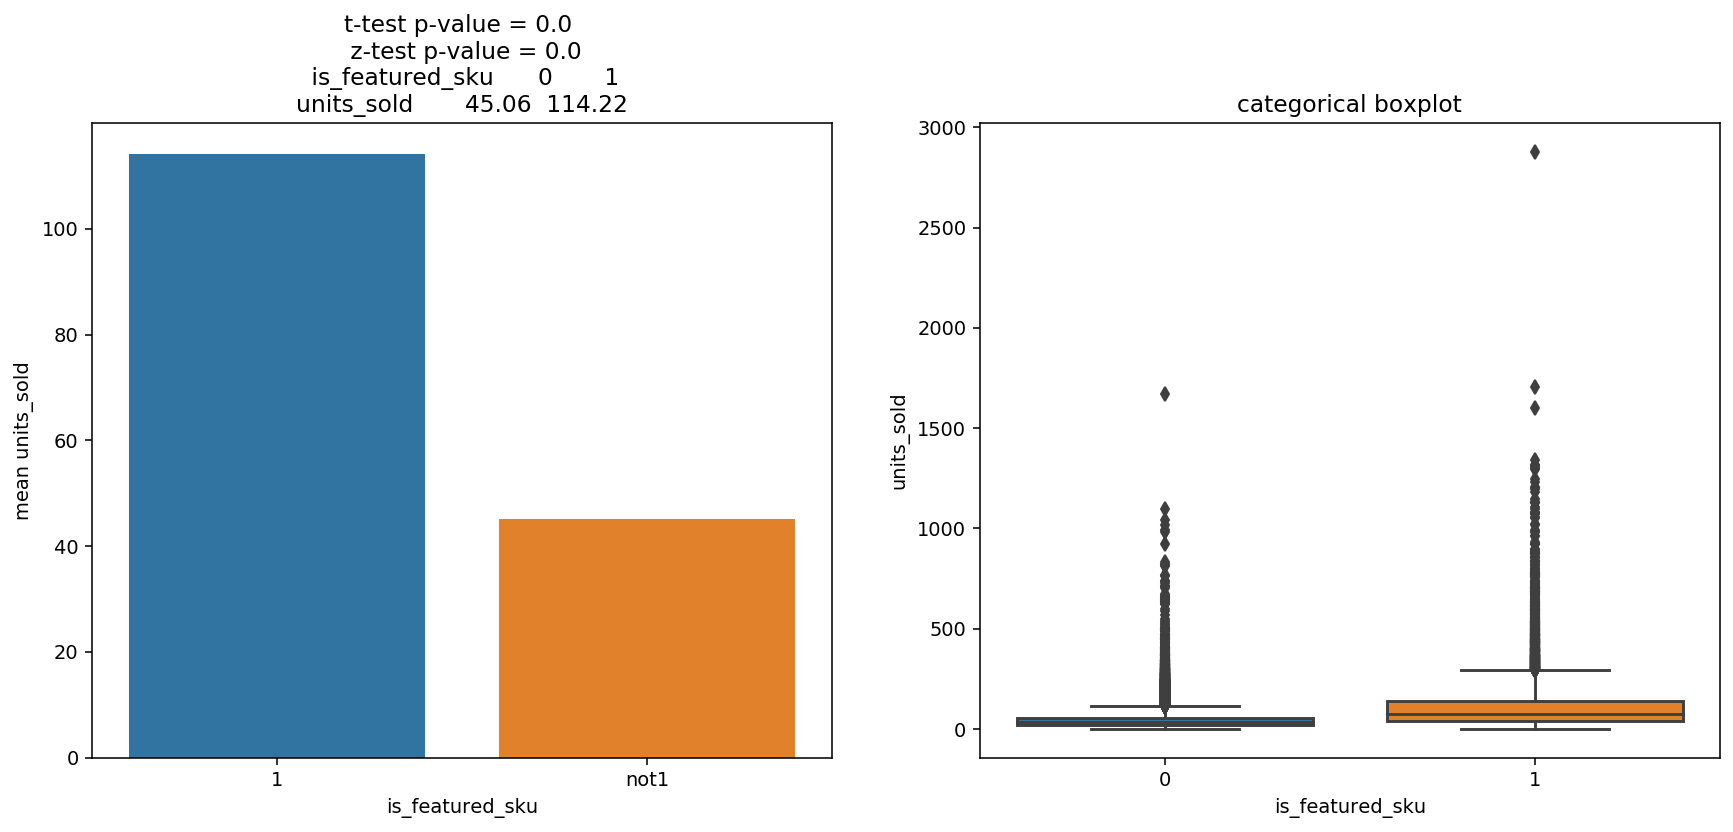

In [53]:
Bivariate_cont_cat(data, 'units_sold','is_featured_sku',1)

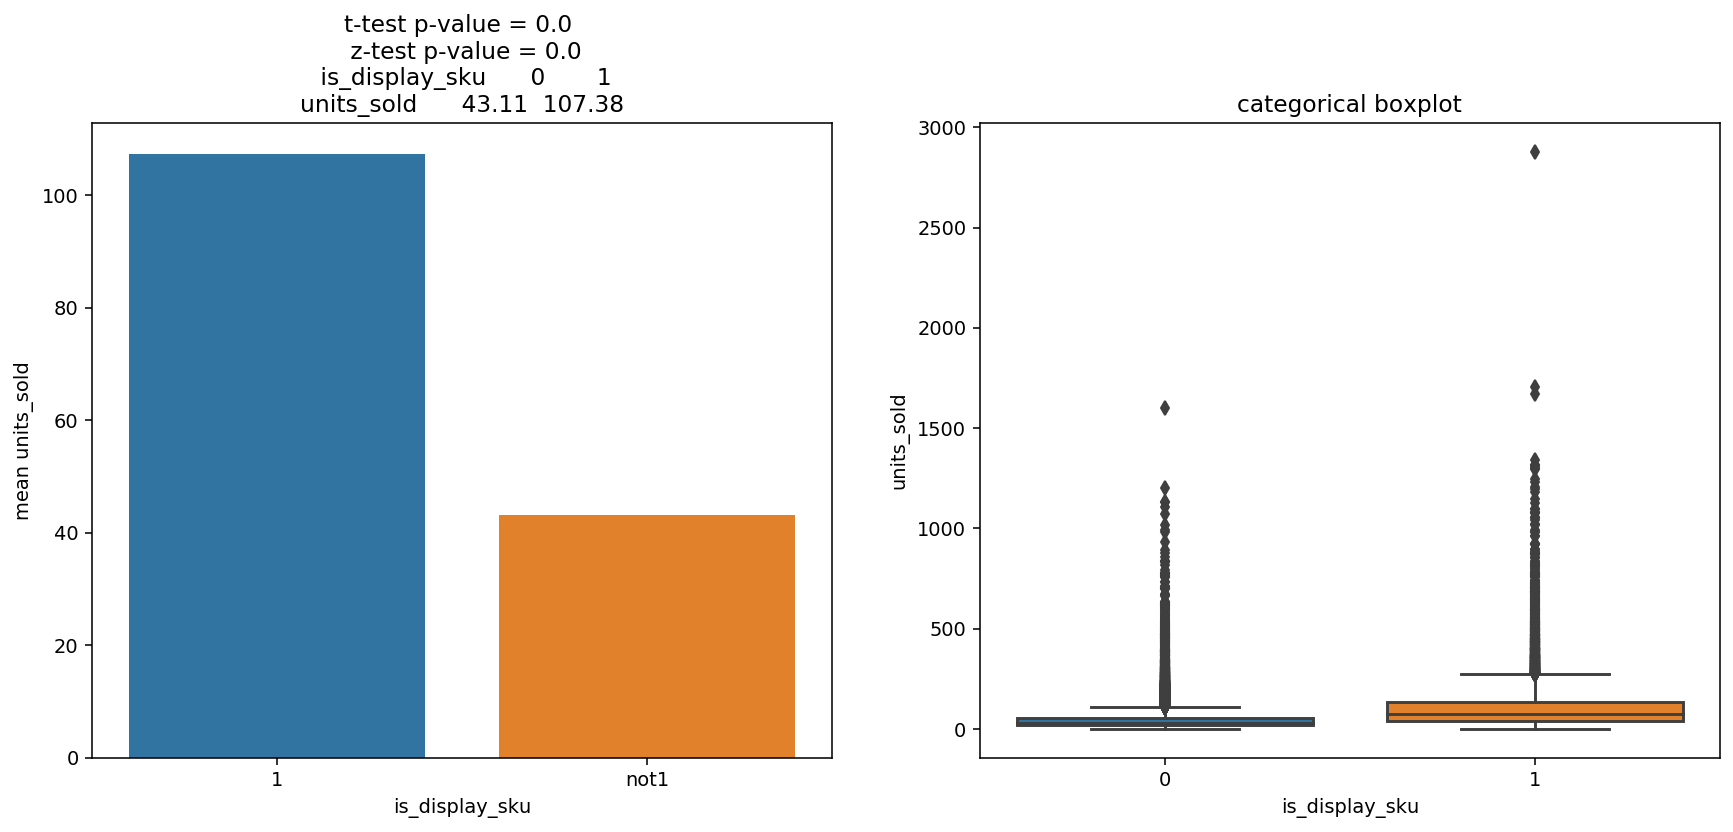

In [54]:
Bivariate_cont_cat(data, 'units_sold','is_display_sku',1)

In [165]:
test = pd.read_csv(r"C:\Users\YashnaBehera\Downloads\test_nfaJ3J5.csv")
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [168]:
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [171]:
data['store_id'] = data['store_id'].astype('category')
data['sku_id'] = data['sku_id'].astype('category')
data['is_featured_sku'] = data['is_featured_sku'].astype('category')
data['is_display_sku'] = data['is_display_sku'].astype('category')

In [172]:
import datetime as dt 
data['week'] = pd.to_datetime(data['week'])

data['moy'] = data['week'].dt.month

data["woy"] = data["week"].apply(lambda x: x.isocalendar()[1])

data['doy'] = data['week'].dt.dayofyear

data['dow'] = data['week'].dt.dayofweek


In [173]:
data.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,moy,woy,doy,dow
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38,9,36,250,5
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30,9,36,250,5
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31,9,36,250,5
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12,9,36,250,5
150149,212644,2013-09-07,9984,679023,234.4125,234.4125,0,0,15,9,36,250,5


In [185]:
data['moy'] = data['moy'].astype('int')
data['dow'] = data['dow'].astype('int')
data['woy'] = data['woy'].astype('int')
data['doy'] = data['doy'].astype('int')

In [189]:
data.drop(["record_ID"], axis=1, inplace=True)

In [188]:
data.drop(["week"], axis=1, inplace=True)

In [192]:
#seperating independent and dependent variables
x = data.drop(['units_sold'], axis=1)
y = data['units_sold']
x

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,moy,woy,doy,dow
0,8091,216418,99.0375,111.8625,0,0,1,3,17,0
1,8091,216419,99.0375,99.0375,0,0,1,3,17,0
2,8091,216425,133.9500,133.9500,0,0,1,3,17,0
3,8091,216233,133.9500,133.9500,0,0,1,3,17,0
4,8091,217390,141.0750,141.0750,0,0,1,3,17,0
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,9,36,250,5
150146,9984,223153,235.8375,235.8375,0,0,9,36,250,5
150147,9984,245338,357.6750,483.7875,1,1,9,36,250,5
150148,9984,547934,141.7875,191.6625,0,1,9,36,250,5


In [184]:
data.dtypes

store_id           category
sku_id             category
total_price         float64
base_price          float64
is_featured_sku    category
is_display_sku     category
units_sold            int64
moy                category
woy                category
doy                category
dow                category
dtype: object

In [190]:
data['moy'] = data['moy'].astype('category')
data['dow'] = data['dow'].astype('category')
data['woy'] = data['woy'].astype('category')
data['doy'] = data['doy'].astype('category')

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

max_accuracy = 0 # maximum accuracy
best_rs = 0 # best random state
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy}")

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [112]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 143)

In [113]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train_x = minmax.fit_transform(train_x)
test_x = minmax.transform(test_x)

In [114]:
# #importing Linear Regression and metric mean square error
# from sklearn.linear_model import LinearRegression as LR
# from sklearn.metrics import mean_squared_log_error as msle

In [115]:
# Creating instance of Linear Regresssion
#lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
# Predicting over the Train Set and calculating error
from sklearn.metrics import mean_squared_log_error as msle
train_predict = lr.predict(train_x)

In [117]:
count=0
for i in train_predict:
    if i<0:
        count+=1
print(count)

2556


In [98]:
k=(np.sqrt(msle(train_predict, train_y)))*100
print('Training Root Mean Squared Log Error ', k )

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [51]:
# from sklearn.metrics import mean_absolute_error as mae
# # Predicting over the Train Set and calculating error
# train_predict = lr.predict(train_x)
# k = mae(train_predict, train_y)
# print('Training Mean Absolute Error', k )

Training Mean Absolute Error 34.48953705648241


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [31]:
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [32]:
x = test[['store_id','sku_id']]

In [33]:
# Predicting over the Train Set and calculating error
test_predict = lr.predict(x)
test["Total sales"]test_predict

array([207.24756192, 207.24770141, 207.24853833, ..., 201.42305676,
       243.63116068, 261.91632683])